In [48]:
#Librerias
import pandas as pd
import numpy as np
from joblib import dump, load  #Para guardar datos como el clf o lm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model,svm
from sklearn.svm import SVR
from time import time
from sklearn.model_selection import GridSearchCV #Para probar parametros de los modelos
from sklearn.metrics import confusion_matrix

In [40]:
datamain = pd.read_csv('CICESEDATA.csv')
datamain.head()

datamain = datamain.fillna(0)
datamain.describe()
feature_cols = ["Mes", "Dia", "Anio", "Evaporacion", "Calor", "Precipitacion"]
y_col = ['TempMax']

df1922to2015 = datamain[(datamain['Anio']>=1922) & (datamain['Anio'] <= 2015)]
df2016 = datamain[(datamain['Anio'] >= 2016)]
dXtrain, dYtrain = df1922to2015[feature_cols] ,  df1922to2015[y_col]
dXtest, dYtest = df2016[feature_cols] ,  df2016[y_col]


X = dXtrain
Y = dYtrain
X.shape, Y.shape

((34302, 6), (34302, 1))

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X,Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [63]:
predict = knn.predict(dXtest)
accurancy_score()

array([30.7, 30.1, 30.2, 31. , 25.5, 24.7, 22.3, 22.3, 28.5, 26.5, 28. ,
       27.9, 27. , 20.2, 26.1, 25.7, 22.4, 27.5, 27.4, 25.1, 26. , 28.2,
       28.7, 28.4, 27.4, 24.9, 25.3, 26.8, 23.9, 26.4, 27.5, 26.7, 30. ,
       28.8, 25.6, 29.2, 26.3, 22.1, 24.3, 28.3, 20.4, 26. , 26.9, 26.8,
       26.2, 27.8, 27. , 27.2, 30.1, 30.9, 30. , 29.3, 29.7, 29.9, 30. ,
       30.5, 27.5, 26.8, 27.6, 30.1, 32.1, 29.3, 32. , 32.3, 26.3, 30.5,
       30.3, 28.9, 31. , 29.4, 19.2, 25.1, 27.7, 29.9, 31.1, 30.9, 30.3,
       31.5, 30.8, 29.8, 28.7, 28.2, 29.1, 28.8, 30.4, 30. , 30.3, 30.5,
       32.3, 31.6, 31.5, 32.3, 31.6, 30.9, 30.6, 31.1, 31.8, 32.2, 33. ,
       33.5, 32.8, 33.2, 33.7, 33.5, 33. , 32.7, 31.9, 31.9, 32.8, 32.7,
       32.9, 32.1, 33.2, 30.6, 30.2, 31.1, 30.6, 29.9, 29.7, 31. , 30.9,
       29.5, 30.8, 31. , 31.1, 31.9, 32.6, 32.6, 32.6, 32.6, 32.9, 33.7,
       32.4, 32.6, 31.5, 33.3, 29.1, 32.3, 32.7, 30.9, 32.9, 33.4, 33.5,
       33.5, 32.6, 32.7, 32.1, 31.7, 31.7, 30.8, 32

## Regresión Lineal

In [36]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [41]:
poly = PolynomialFeatures(degree=7)
X_data = poly.fit_transform(dXtrain)
lm = linear_model.LinearRegression()
lm.fit(X_data, dYtrain)
print("Regresión de grado 7") #+str(d))
print("R2:" +str(lm.score(X_data, dYtrain)))
print(lm.intercept_)
print(lm.coef_)
regresion_validation(X_data, dYtrain, lm.predict(X_data))

Regresión de grado 7
R2:0.9443813585566408
[-2270.31223268]
[[-3.84180582e-11 -1.33156432e-11  3.89227681e-13 ...  2.74276465e-09
  -4.43159772e-10 -5.24680022e-11]]
SSD: TempMax    83594.252934
dtype: float64, RSE: TempMax    1.561115
dtype: float64, Y_mean: TempMax    26.898044
dtype: float64, error: TempMax    5.803823
dtype: float64%


In [42]:
X2_data = poly.fit_transform(dXtest)
print("R2:" +str(lm.score(X2_data, dYtest)))
regresion_validation(X2_data, dYtest, lm.predict(X2_data))

R2:0.8187752963613997
SSD: TempMax    597.512802
dtype: float64, RSE: TempMax    1.399664
dtype: float64, Y_mean: TempMax    29.609477
dtype: float64, error: TempMax    4.72708
dtype: float64%


In [43]:
res1r = dYtest['TempMax'].tolist()
res2r = pd.DataFrame(lm.predict(X2_data),columns = ['Prediccion2016R'])
res3r = pd.DataFrame(res1,columns=['TempMax2016'])
Predic2016 = pd.concat([res3r, res2r], axis=1, sort = False)
Predic2016.head()

,TempMax2016,Prediccion2016R
0,29.5,30.148935
1,29.0,29.807606
2,28.0,29.604457
3,28.5,30.020084
4,21.5,22.369699


## Máquina de soporte vectorial

In [3]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [0.1, 0.2],
        'C': [1,10]
    },
    {
        'kernel':["linear"],
        'C':[1,10]
    }
]

In [4]:
start_time = time()
clf = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=parameters, cv=5)
clf.fit(X,Y)
elapsed_time = (time()-start_time)/60
print('Time: ', elapsed_time)
print(clf.best_params_)

Time:  135.42234452168148
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [5]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-3,1e-2, 0.1],
        'C': [1]
    }
]

In [6]:
start_time = time()
clf = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=parameters, cv=5)
clf.fit(X,Y)
elapsed_time = (time()-start_time)/60
print('Time: ', elapsed_time)
print(clf.best_params_)

Time:  19.72234173218409
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [15]:
BestSVM = clf.best_estimator_
datospred = BestSVM.predict(dXtest)
#Guardar datos con el mejor parametro
dump(BestSVM, 'BestSVM.joblib')

['BestSVM.joblib']

In [21]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [0.001],
        'C': [1]
    }
]

In [22]:
start_time = time()
clf = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=parameters, cv=5)
clf.fit(X,Y)
elapsed_time = (time()-start_time)/60
print('Time: ', elapsed_time)
print(clf.best_params_)

Time:  6.802847866217295
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [23]:
res1 = dYtest['TempMax'].tolist()
res2 = clf.predict(dXtest)
res3 = pd.DataFrame(res1,columns=['TempMax2016'])
res4 = pd.DataFrame(res2,columns=['PredicSVM2016'])

Predic2016SVM = pd.concat([res3, res4], axis=1, sort = False)
Predic2016SVM.head()

,TempMax2016,PredicSVM2016
0,29.5,30.467804
1,29.0,30.108112
2,28.0,29.567733
3,28.5,30.131273
4,21.5,24.932830


In [22]:
SSD = np.sum((res1 - res2)**2)
RSE = np.sqrt(SSD/(len(dXtest)-1))
y_mean = np.mean(res1)
error = RSE/y_mean
print("R2:" +str(clf.score(dXtest, dYtest)))
print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

R2:0.7612658150073166
SSD: 787.1263073920243, RSE: 1.6064687956662151, Y_mean: 29.609477124183005, error: 5.425522338434544%


In [6]:
for c in range(1,5): 
    start_time = time()
    svr_rbf = SVR(kernel="rbf", C=c, gamma=0.01)
    y_rbf = svr_rbf.fit(X,Y).predict(X)
    elapsed_time = (time()-start_time)/60
    elapsed_time
    SSD = np.sum((Y - y_rbf)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("Valor C:",c)
    print("Elapsed time: ",elapsed_time)
    print("R2:" +str(svr_rbf.score(X, Y)))
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

Elapsed time:  1.4857786019643149
R2:0.9337113389885173
SSD: 99631.18392407507, RSE: 1.7042929786655823, Y_mean: 26.89804384583992, error: 6.3361223902873895%
Elapsed time:  1.5827795227368673
R2:0.9424819194811387
SSD: 86449.09056379595, RSE: 1.587547848323929, Y_mean: 26.89804384583992, error: 5.902094060901239%
Elapsed time:  1.6639663656552632
R2:0.9463015331963424
SSD: 80708.24996192484, RSE: 1.5339301170819302, Y_mean: 26.89804384583992, error: 5.702757144249245%
Elapsed time:  1.7679206093152364
R2:0.9484465179024033
SSD: 77484.35974445834, RSE: 1.5029814955059524, Y_mean: 26.89804384583992, error: 5.587698139388694%


In [7]:
for c in range(30,110,10): 
    start_time = time()
    svr_rbf = SVR(kernel="rbf", C=c, gamma=0.01)
    y_rbf = svr_rbf.fit(X,Y).predict(X)
    elapsed_time = (time()-start_time)/60
    elapsed_time
    SSD = np.sum((Y - y_rbf)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("Valor C:",c)
    print("Elapsed time: ",elapsed_time)
    print("R2:" +str(svr_rbf.score(X, Y)))
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

Valor C: 10
Elapsed time:  2.4801759123802185
R2:0.9532472253461007
SSD: 70268.94523780767, RSE: 1.4312922726285637, Y_mean: 26.89804384583992, error: 5.321176070764451%
Valor C: 20
Elapsed time:  3.830290190378825
R2:0.9559043737026971
SSD: 66275.27825781338, RSE: 1.390024289175631, Y_mean: 26.89804384583992, error: 5.167752335977449%


In [8]:
for c in range(30,110,10): 
    start_time = time()
    svr_rbf = SVR(kernel="rbf", C=c, gamma=0.01)
    y_rbf = svr_rbf.fit(X,Y).predict(X)
    elapsed_time = (time()-start_time)/60
    elapsed_time
    SSD = np.sum((Y - y_rbf)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("Valor C:",c)
    print("Elapsed time: ",elapsed_time)
    print("R2:" +str(svr_rbf.score(X, Y)))
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

Valor C: 30
Elapsed time:  6.138815995057424
R2:0.9572010902155546
SSD: 64326.32651525948, RSE: 1.3694336166896863, Y_mean: 26.89804384583992, error: 5.09120151836426%
Valor C: 40
Elapsed time:  8.36830402612686
R2:0.9580203629652181
SSD: 63094.96789735684, RSE: 1.356263178356771, Y_mean: 26.89804384583992, error: 5.042237220408621%
Valor C: 50
Elapsed time:  10.620464972654979
R2:0.9585203370093393
SSD: 62343.51198940791, RSE: 1.348162494718666, Y_mean: 26.89804384583992, error: 5.012120964800845%
Valor C: 60
Elapsed time:  12.061873809496563
R2:0.9589130072713221
SSD: 61753.33257567158, RSE: 1.3417660812875405, Y_mean: 26.89804384583992, error: 4.988340746924091%
Valor C: 70
Elapsed time:  13.743368248144785
R2:0.95924873331126
SSD: 61248.73974904371, RSE: 1.3362729828339222, Y_mean: 26.89804384583992, error: 4.967918821504158%
Valor C: 80
Elapsed time:  14.806520799795786
R2:0.9595125606488506
SSD: 60852.209941462745, RSE: 1.3319403837624582, Y_mean: 26.89804384583992, error: 4.9518

In [68]:
for c in range(200,1100,100): 
    start_time = time()
    svr_rbf = SVR(kernel="rbf", C=c, gamma=0.01)
    y_rbf = svr_rbf.fit(X,Y).predict(X)
    elapsed_time = (time()-start_time)/60
    elapsed_time
    SSD = np.sum((Y - y_rbf)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("Valor C:",c)
    print("Elapsed time: ",elapsed_time)
    print("R2:" +str(svr_rbf.score(X, Y)))
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

Valor C: 200
Elapsed time:  41.457664148012796
R2:0.9612917898763286
SSD: 58178.04649177047, RSE: 1.3023453880832938, Y_mean: 26.89804384583992, error: 4.841784761551409%
Valor C: 300
Elapsed time:  69.00100571314493
R2:0.962108475745757
SSD: 56950.575928575316, RSE: 1.28853336758052, Y_mean: 26.89804384583992, error: 4.790435226314072%
Valor C: 400
Elapsed time:  94.74168970982234
R2:0.96260194436763
SSD: 56208.897604161975, RSE: 1.2801154615900678, Y_mean: 26.89804384583992, error: 4.759139619694136%
Valor C: 500
Elapsed time:  130.44971615870793
R2:0.9629954488923725
SSD: 55617.46430197535, RSE: 1.2733629271660099, Y_mean: 26.89804384583992, error: 4.734035435677043%
Valor C: 600
Elapsed time:  160.1776743253072
R2:0.9633386092918693
SSD: 55101.697708472784, RSE: 1.2674449320337773, Y_mean: 26.89804384583992, error: 4.712033853829121%
Valor C: 700
Elapsed time:  182.07585612138112
R2:0.963624295461188
SSD: 54672.31429891775, RSE: 1.2624969520543274, Y_mean: 26.89804384583992, error:

In [88]:
#import pickle
y_rbf.dumps
#newp
#Guardar datos con el mejor parametro
#pickle.dump(svr_rbf, open('SVMC1000g01.joblib', 'wb'))
#s = pickle.dumps(svr_rbf)
#dump(svr_rbf.fit_status_, 'SVMC1000g01.joblib')

<function ndarray.dumps>

In [87]:
#nsvm = pickle.load(open('SVMC1000g01.joblib', 'rb'))
nsvm = pickle.loads(s)
#nsvm = load('SVMC1000g01.joblib')
test = nsvm.predict(dYtrain)

ValueError: X.shape[1] = 34302 should be equal to 6, the number of features at training time

Calculos con parametros parecidos a la regresion grado 7

In [18]:
svr_rbf = SVR(kernel="rbf", C=3, gamma=0.01)
y_rbf = svr_rbf.fit(X,Y).predict(dXtest)
SSD = np.sum((res1 - y_rbf)**2)
RSE = np.sqrt(SSD/(len(dXtest)-1))
y_mean = np.mean(res1)
error = RSE/y_mean
print("Elapsed time: ",elapsed_time)
print("R2:" +str(svr_rbf.score(dXtest, dYtest)))
print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")
#Guardar datos
dump(y_rbf, 'SVMC3G01.joblib')

Elapsed time:  20.73982350031535
R2:0.7872371615711725
SSD: 701.4966347105315, RSE: 1.5165714510909263, Y_mean: 29.609477124183005, error: 5.121912301018967%


Buscando mejor prediccion

In [56]:
Y = dYtrain['TempMax']
Y.shape

(34302,)

In [67]:
y_rbf100 = load('SVMC100G01.joblib')
y_rbf = y_rbf100.fit(X,Y).predict(dXtest)
SSD = np.sum((res1 - y_rbf100)**2)
RSE = np.sqrt(SSD/(len(dXtest)-1))
y_mean = np.mean(res1)
error = RSE/y_mean
print("R2:" +str(svr_rbf.score(dXtest, dYtest)))
print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [57]:
svr_rbf = SVR(kernel="rbf", C=200, gamma=0.01)
y_rbf = svr_rbf.fit(X,Y).predict(dXtest)
SSD = np.sum((res1 - y_rbf)**2)
RSE = np.sqrt(SSD/(len(dXtest)-1))
y_mean = np.mean(res1)
error = RSE/y_mean
print("Elapsed time: ",elapsed_time)
print("R2:" +str(svr_rbf.score(dXtest, dYtest)))
print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")
#Guardar datos
dump(y_rbf, 'SVMC200G01.joblib')

Elapsed time:  6.802847866217295
R2:0.7250714293526906
SSD: 906.4621835235541, RSE: 1.7239510315242774, Y_mean: 29.609477124183005, error: 5.822294748042921%


['SVMC200G01.joblib']

In [64]:
res5 = pd.DataFrame(y_rbf,columns=['PredicSVM2016_2'])
Predic2016_2 = pd.concat([res3, res2r, res4, res5], axis=1, sort = False)
Predic2016_2.head()

,TempMax2016,Prediccion2016R,PredicSVM2016,PredicSVM2016_2
0,29.5,30.148935,30.467804,32.075008
1,29.0,29.807606,30.108112,31.629577
2,28.0,29.604457,29.567733,31.677211
3,28.5,30.020084,30.131273,32.208434
4,21.5,22.369699,24.932830,22.968978


In [45]:
Cat = 'Dia'
Ejex = dXtest[Cat]

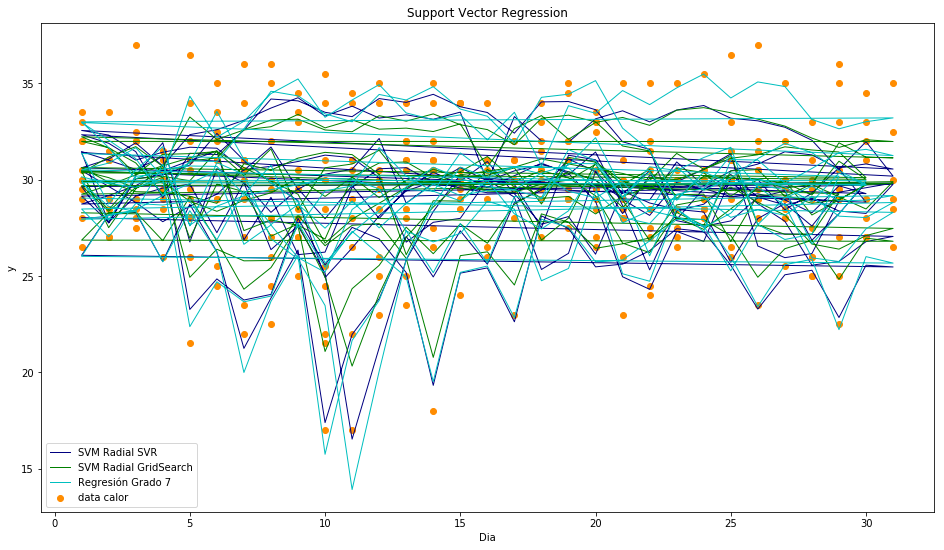

In [46]:
lw = 1
plt.figure(figsize=(16,9))
plt.scatter(Ejex,res1, color="darkorange", label ="data calor")
plt.plot(Ejex,y_rbf, color="navy", lw=lw, label="SVM Radial SVR")
plt.plot(Ejex,res2, color="green", lw=lw, label="SVM Radial GridSearch")
plt.plot(Ejex,res2r, color="c", lw=lw, label="Regresión Grado 7")
plt.xlabel(Cat)
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()
